Notebook to look at New NEMO 3.6 Tidal Runs

In [1]:
%matplotlib inline
from matplotlib import pylab
import matplotlib.pyplot as plt
import netCDF4 as NC
import numpy as np
from salishsea_tools import nc_tools
from salishsea_tools import viz_tools
from salishsea_tools import tidetools
 

In [2]:
# Point Atkinson
old_PA = NC.Dataset('../../myResults/NEMO36_Tides/weaklog/PointAtkinson.nc')
bilap_PA_1 = NC.Dataset('../../myResults/NEMO36_Tides/bilap/E1/PointAtkinson_0000.nc')

In [3]:
# Victoria
old_Vic = NC.Dataset('../../myResults/NEMO36_Tides/weaklog/Victoria.nc')
bilap_Vic_1 = NC.Dataset('../../myResults/NEMO36_Tides/bilap/E1/Victoria_0000.nc')

In [4]:
# Check Dimensions
nc_tools.show_dimensions(bilap_PA_1)
print bilap_PA_1.variables['time_counter'][0]

<type 'netCDF4.Dimension'>: name = 'axis_nbounds', size = 2

<type 'netCDF4.Dimension'>: name = 'x', size = 1

<type 'netCDF4.Dimension'>: name = 'y', size = 1

<type 'netCDF4.Dimension'> (unlimited): name = 'time_counter', size = 720

3259872900.0


In [5]:
# Check Variables
nc_tools.show_variables(bilap_PA_1)

[u'nav_lat', u'nav_lon', u'sossheig', u'time_centered', u'time_centered_bounds', u'time_counter', u'time_counter_bounds']


# Point Atkinson

In [6]:
SSH = bilap_PA_1.variables['sossheig'][:]
#SSH = np.append(SSH, PA_2.variables['sossheig'][:])

oldSSH = old_PA.variables['sossheig'][:]

print SSH.shape, oldSSH.shape

(720, 1, 1) (1920, 1, 1)


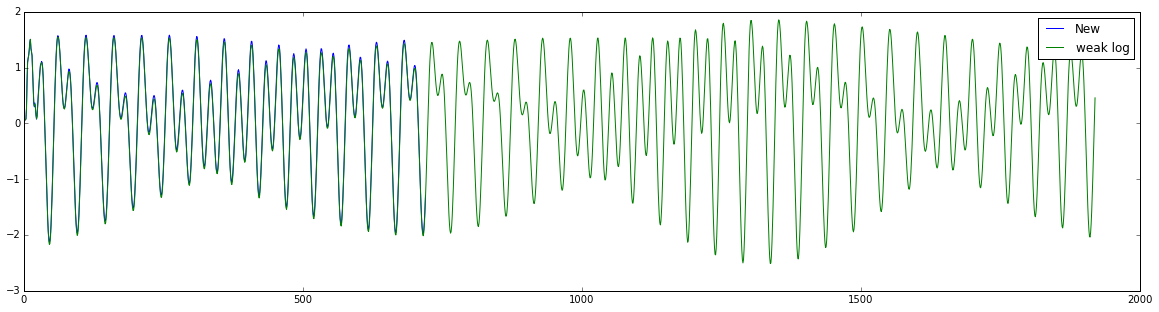

In [12]:
length = SSH.shape[0]
plt.figure(figsize=(20,5))
plt.plot(np.arange(0.5,length,1),SSH[:,0,0], label='New')
#plt.plot(1200-1, SSH[1200-1],'o')
plt.plot(np.arange(0.5,oldSSH.shape[0],1),oldSSH[:,0,0], label="weak log")
plt.legend()

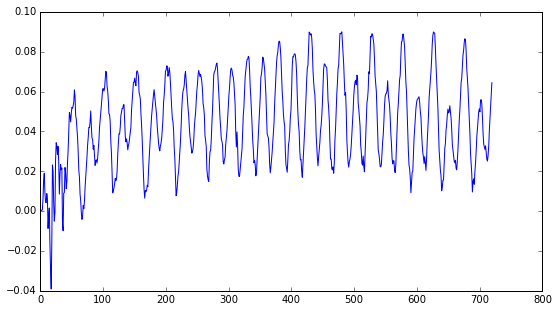

In [16]:
diffPA = SSH[:,0,0]-oldSSH[:length,0,0]
plt.figure(figsize=(9,5))
plt.plot(np.arange(0.5,SSH.shape[0],1), diffPA)

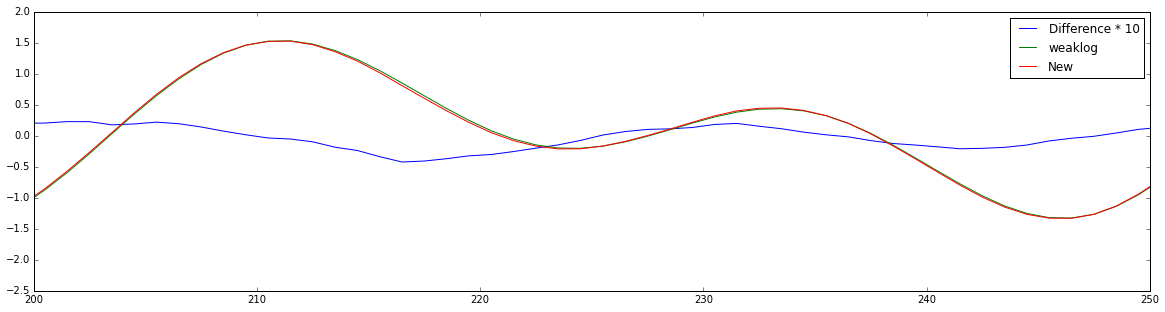

In [19]:
plt.figure(figsize=(20,5))
plt.xlim((200,250))
plt.plot(np.arange(0.5,SSH.shape[0],1), (diffPA-0.05)*10., label = "Difference * 10")
plt.plot(np.arange(0.5,length,1),oldSSH[:length,0,0], label = 'weaklog')
plt.plot(np.arange(0.5,SSH.shape[0],1), SSH[:,0,0]-0.05, label ='New')
plt.legend()

# Victoria

In [21]:
SSH = bilap_Vic_1.variables['sossheig'][:]
#SSH = np.append(SSH, PR_2.variables['sossheig'][:])
print SSH.shape
oldSSH = old_Vic.variables['sossheig'][:]
print oldSSH.shape

(720, 1, 1)
(1920, 1, 1)


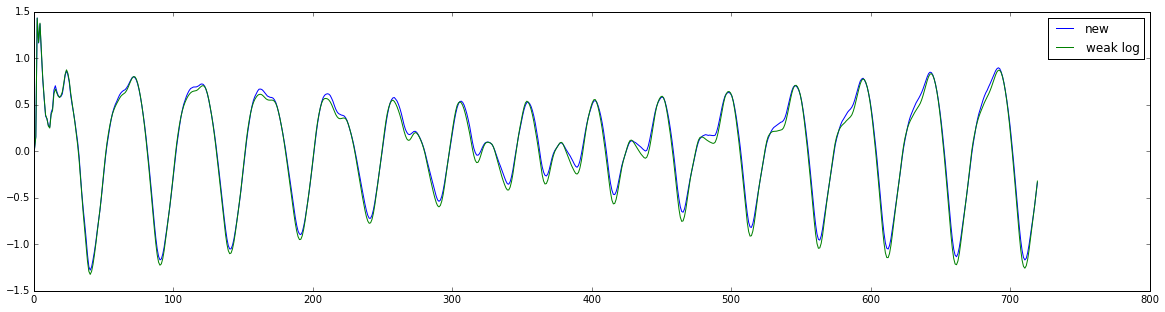

In [22]:
length = SSH.shape[0]
plt.figure(figsize=(20,5))
plt.plot(np.arange(0.5,length,1),SSH[:,0,0], label="new")
plt.plot(np.arange(0.5,length,1),oldSSH[:length,0,0], label="weak log")
plt.legend()

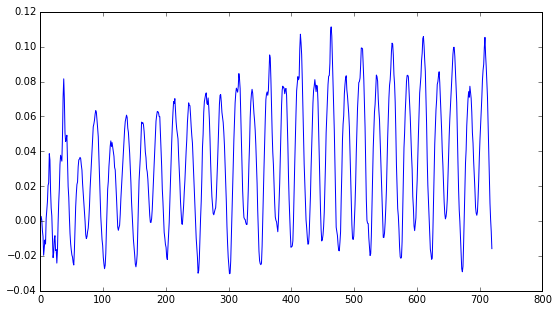

In [24]:
diffVic = SSH[:,0,0] - oldSSH[:length,0,0]
plt.figure(figsize=(9,5))
plt.plot(np.arange(0.5,length,1), diffVic)

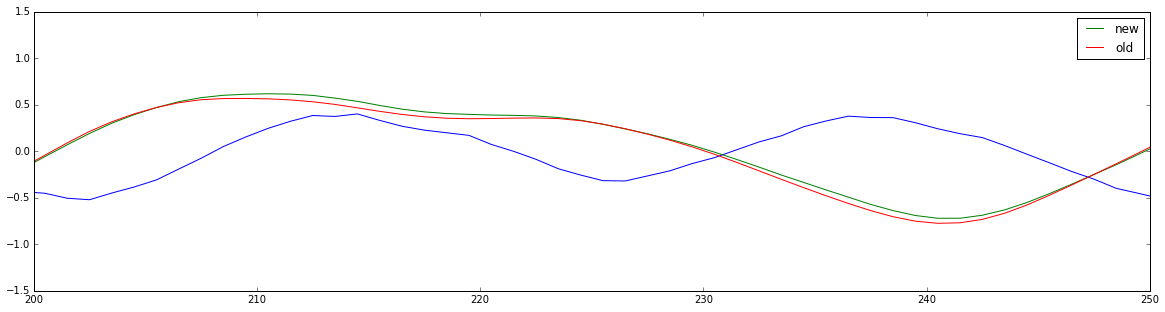

In [28]:
plt.figure(figsize=(20,5))
plt.xlim((200,250))
plt.plot(np.arange(0.5,length,1), (diffVic-0.03)*10.)
plt.plot(np.arange(0.5,length,1),SSH[:,0,0], label='new')
plt.plot(np.arange(0.5,length,1), oldSSH[:length,0,0], label='old')
plt.legend()

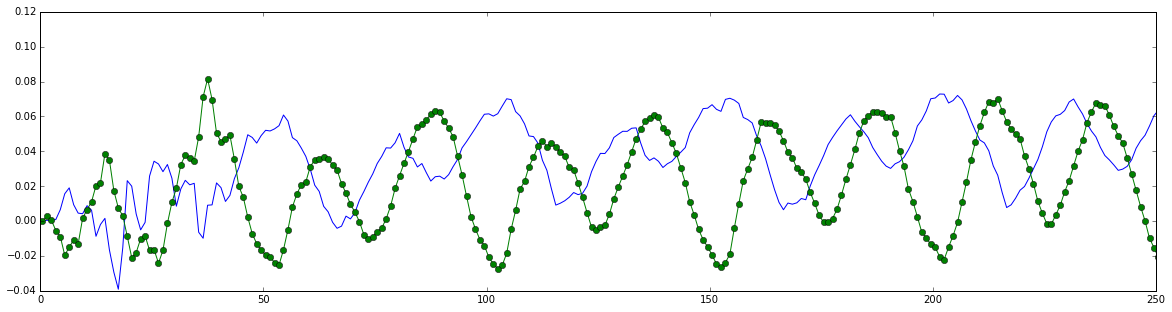

In [30]:
plt.figure(figsize=(20,5))
plt.xlim((0,250))
plt.plot(np.arange(0.5,length,1), diffPA)
plt.plot(np.arange(0.5,length,1), diffVic, 'go-')